In [58]:
!pip install -U kaleido

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 85.8/85.8 MB 18.8 MB/s eta 0:00:0000:0100:01


In [62]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import matplotlib as mpl
import seaborn as sb
import ROOT as r
from matplotlib import image
from array import array
import uproot
from pathlib import Path
import plotly.graph_objects as go
import plotly.express as px
from matplotlib.colors import Normalize
from plotly.subplots import make_subplots
from mpl_toolkits.axes_grid1 import ImageGrid
from itertools import chain
import matplotlib
import multiprocessing as mp
import os
import plotly.figure_factory as ff

def plot_arrays_from_params(paramsShield, is_sc=False, return_fig=False):
    dZ = paramsShield[0:8]
    dX_in = paramsShield[8::6]
    dX_out = paramsShield[9::6]
    dY_in = paramsShield[10::6]
    dY_out = paramsShield[11::6]
    gap_in = paramsShield[12::6]
    gap_out = paramsShield[13::6]

    yGaps = []
    xGaps=[]
    
    plot_z = []
    plot_x = []
    plot_y = []
    
    for i in range(2, 8):
        yGaps = yGaps + [-dY_in[i], dY_in[i], dY_out[i], -dY_out[i], -dY_in[i], None]
        xGaps = xGaps + [dX_in[i], dX_in[i]+gap_in[i], dX_out[i]+gap_out[i] , dX_out[i], dX_in[i], None]
        c_z = 0 if len(plot_z) == 0 else plot_z[-3]
        plot_z = plot_z + [c_z+10, c_z+10, c_z+10 + 2*dZ[i], c_z + 10 + 2*dZ[i], c_z + 10, None]
        if is_sc and i == 3:
            plot_x = plot_x + [-(4*dX_in[i]+gap_in[i]), (4*dX_in[i]+gap_in[i]), (4*dX_out[i]+gap_out[i]), -(4*dX_out[i]+gap_out[i]), -(4*dX_in[i]+gap_in[i]), None]
            plot_y = plot_y + [-(3*dX_in[i]+dY_in[i]), (3*dX_in[i]+dY_in[i]), (3*dX_out[i]+dY_out[i]), -(3*dX_out[i]+dY_out[i]), -(3*dX_in[i]+dY_in[i]), None]
        else:
            plot_x = plot_x + [-(2*dX_in[i]+gap_in[i]), (2*dX_in[i]+gap_in[i]), (2*dX_out[i]+gap_out[i]), -(2*dX_out[i]+gap_out[i]), -(2*dX_in[i]+gap_in[i]), None]
            plot_y = plot_y + [-(dX_in[i]+dY_in[i]), (dX_in[i]+dY_in[i]), (dX_out[i]+dY_out[i]), -(dX_out[i]+dY_out[i]), -(dX_in[i]+dY_in[i]), None]
    return([plot_x, plot_y, plot_z, xGaps, yGaps])
        
def plot_shield_from_verts_part(plot_verts, is_sc, what_to_plot, fig, row, col):
    gap_color = 'rgba(168, 235, 203, 0.5)'
    #gap_color = "white"
    up_color = 'rgba(255,99,71, 0.8)'
    #up_color = "red"
    down_color = 'rgba(255,99,71, 0.8)'
    #down_color = "red"
    x, y, z, gap_x, gap_y = plot_verts
    
    zMax = np.max([ik for ik in z if ik is not None])
    zMin = np.min([ik for ik in z if ik is not None])
    half_position = np.argwhere(np.invert([np.isscalar(xi) for xi in x])).flatten()[2]
#     print(half_position)
#     print(half_position)
    if what_to_plot==0:
        if is_sc:
            gap_x = gap_x[:half_position-6] + gap_x[half_position:]
            data = [
                go.Scatter(x=z[:half_position-6], y=x[:half_position-6], fill="toself", fillcolor=up_color, line_color=up_color, marker=dict(opacity=0), meta=dict(name="Up polarity"), showlegend = False),
                go.Scatter(x=z[half_position:], y=x[half_position:], fill="toself", fillcolor=down_color, line_color=down_color, marker=dict(opacity=0), meta=dict(name="Up polarity"), showlegend = False), 
                go.Scatter(x=z[:half_position-6] + z[half_position:], y=gap_x, fill="toself", fillcolor=gap_color, line_color=gap_color, marker=dict(opacity=0), showlegend = False),
                go.Scatter(x=z[:half_position-6] + z[half_position:], y=[-p if p else None for p in gap_x], fill="toself", fillcolor=gap_color, line_color=gap_color, marker=dict(opacity=0), showlegend = False)
                   ]
        else:
            data = [
                go.Scatter(x=z[:half_position], y=x[:half_position], fill="toself", fillcolor=up_color, line_color=up_color, marker=dict(opacity=0), meta=dict(name="Up polarity"), showlegend = False),
                go.Scatter(x=z[half_position:], y=x[half_position:], fill="toself", fillcolor=down_color, line_color=down_color, marker=dict(opacity=0), meta=dict(name="Up polarity"), showlegend = False), 
                go.Scatter(x=z, y=gap_x, fill="toself", fillcolor=gap_color, line_color=gap_color, marker=dict(opacity=0), showlegend = False),
                go.Scatter(x=z, y=[-p if p else None for p in gap_x], fill="toself", fillcolor=gap_color, line_color=gap_color, marker=dict(opacity=0), showlegend = False)
                   ]

        down_color = 'rgba(135,206,250, 0.9)'
        #down_color = 'blue'
        rec_1 = go.Scatter(x=[996.322, 996.322, 1365.99, 1365.99, 996.322], y=[-25 , 25, 45, -45, -25], fill="toself", 
                           fillcolor=down_color, line_color=down_color, marker=dict(opacity=0), 
                           meta=dict(name="Up polarity"), showlegend = False)
        data.append(rec_1)
        
        rec_1 = go.Scatter(x=[996.322, 996.322, 1365.99, 1365.99, 996.322], y=[-25, 25, 25, -25, -25], fill="toself", 
                           fillcolor="green", line_color="green", marker=dict(opacity=0), 
                           meta=dict(name="Up polarity"), showlegend = False)
        data.append(rec_1)

        rec_2 = go.Scatter(x=[1375.99, 1375.99, 1676.376, 1676.376, 1375.99], y=[-2, 2, 98, -98, -4], fill="toself", 
                           fillcolor=down_color, line_color=down_color, marker=dict(opacity=0), 
                           meta=dict(name="Up polarity"), showlegend = False)
        data.append(rec_2)
        
        rec_2 = go.Scatter(x=[1405., 1405., 1676.376, 1676.376, 1405.], y=[-25, 25, 25, -25, -25], fill="toself", 
                           fillcolor="green", line_color="green", marker=dict(opacity=0), 
                           meta=dict(name="Up polarity"), showlegend = False)
        data.append(rec_2)

        rec_3 = go.Scatter(x=[1686.376, 1686.376, 2060, 2060, 1686.376], y=[0, 0, 96, -96, 0], fill="toself", 
                           fillcolor=down_color, line_color=down_color, marker=dict(opacity=0), 
                           meta=dict(name="Up polarity"), showlegend = False)
        data.append(rec_3)
        
        rec_3 = go.Scatter(x=[1686.376, 1686.376, 2060, 2060, 1686.376], y=[-25, 25, 25, -25, -25], fill="toself", 
                           fillcolor="green", line_color="green", marker=dict(opacity=0), 
                           meta=dict(name="Up polarity"), showlegend = False)
        data.append(rec_3)

        rec_3 = go.Scatter(x=[20, 726.156, 726.156, 20, 20], y=[209, 199, 55, 55, 209], fill="toself", 
                           fillcolor=down_color, line_color=down_color, marker=dict(opacity=0), 
                           meta=dict(name="Up polarity"), showlegend = False)
        data.append(rec_3)
        rec_3 = go.Scatter(x=[20, 726.156, 726.156, 20, 20], y=[-209, -199, -55, -55, -209], fill="toself", 
                           fillcolor=down_color, line_color=down_color, marker=dict(opacity=0), 
                           meta=dict(name="Up polarity"), showlegend = False)
        data.append(rec_3)
        
        for lines in data:
            fig.add_trace(lines,
                #row=row, col=col
                         )
        #fig.add_trace(rec_1)


            # Update xaxis properties
        fig.update_xaxes(title_text = 'Z [cm]',
                         range=[zMin, zMax+50], 
                         #row=row, col=col
                        )
        # Update yaxis properties
        fig.update_yaxes(title_text='X [cm]', range=[-330, 330], 
                         #row=row, col=col
                        )

        
    else:
        if is_sc:
            gap_y = gap_y[:half_position-6] + gap_y[half_position:]
            data=[
            go.Scatter(x=z[:half_position-6], y=y[:half_position-6], fill="toself", fillcolor=up_color, line_color=up_color, marker=dict(opacity=0), meta=dict(name="Up polarity"), showlegend = False),
            go.Scatter(x=z[half_position:], y=y[half_position:], fill="toself", fillcolor=down_color, line_color=down_color, marker=dict(opacity=0), meta=dict(name="Up polarity"), showlegend = False), 
            go.Scatter(x=z[:half_position-6] + z[half_position:], y=gap_y, fill="toself", fillcolor=gap_color, line_color=gap_color, marker=dict(opacity=0), showlegend = False)
               ]
        else:
            data=[
            go.Scatter(x=z[:half_position], y=y[:half_position], fill="toself", fillcolor=up_color, line_color=up_color, marker=dict(opacity=0), meta=dict(name="Up polarity"), showlegend = False),
            go.Scatter(x=z[half_position:], y=y[half_position:], fill="toself", fillcolor=down_color, line_color=down_color, marker=dict(opacity=0), meta=dict(name="Up polarity"), showlegend = False), 
            go.Scatter(x=z, y=gap_y, fill="toself", fillcolor=gap_color, line_color=gap_color, marker=dict(opacity=0), showlegend = False)
               ]

        for lines in data:
            fig.add_trace(lines,
            #row=row, col=col
                         ) 
        fig.update_xaxes(title_text='Z [cm]', range=[zMin, zMax+50], 
                         #row=row, col=col
                        )
        # Update yaxis properties
        fig.update_yaxes(title_text='Y [cm]', range=[-330, 330], 
                         #row=row, col=col
                        )

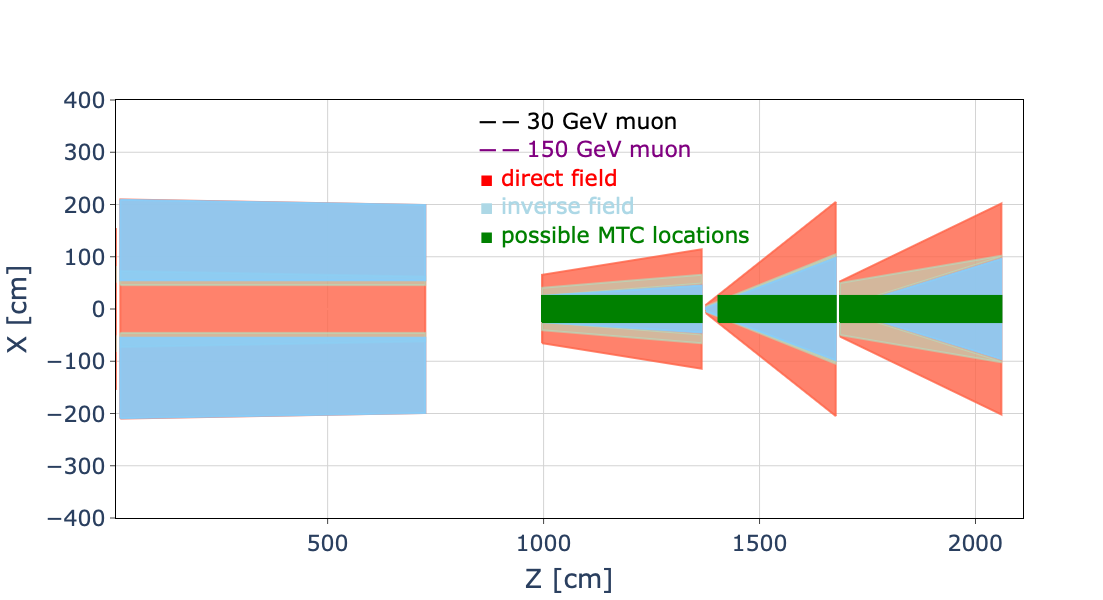

In [67]:
shield = [70,170,0,353.078,125.083,184.834,150.193,186.812,40,40,150,150,2,2,80,80,150,150,2,2,72,51,29,46,10,7,45.6888,45.6888,22.1839,22.1839,27.0063,16.2448,10,31,35,31,51,11,24.7961,48.7639,8,104.732,15.7991,16.7793,3,100,192,192,2,4.8004,3,100,8,172.729,46.8285,2]
is_sc = True
fig = go.Figure()

plot_shield_from_verts_part(plot_arrays_from_params(shield, is_sc = is_sc), is_sc, 0, fig, 1, 1)
# plot_shield_from_verts_part(plot_arrays_from_params(shield, is_sc = is_sc), is_sc, 1, fig, 2, 1)


import plotly.graph_objs as go

# Add an invisible yellow dashed line for "30 GeV muon"
fig.add_trace(go.Scatter(
    x=[None], y=[None],  # Invisible line (no data points)
    mode='lines',
    line=dict(color='black', dash='dash'),
    showlegend=False  # Do not show in legend
))

# Add an invisible purple straight line for "150 GeV muon"
fig.add_trace(go.Scatter(
    x=[None], y=[None],  # Invisible line (no data points)
    mode='lines',
    line=dict(color='purple', dash='solid'),
    showlegend=False  # Do not show in legend
))

# Add an annotation (textbox) with the two legends
fig.add_annotation(
    x=0.55, y=.99,  # Position the annotation above the plot
    xref="paper", yref="paper",
        text=(
        "<span style='color:black;'>─ ─ 30 GeV muon</span><br>"
        "<span style='color:purple;'>─ ─ 150 GeV muon</span><br>"
        "<span style='color:red;'>■ direct field</span><br>"
        "<span style='color:lightblue;'>■ inverse field</span><br>"
        "<span style='color:green;'>■ possible MTC locations</span>"
            
    ),
    showarrow=False,
    align='left',
    font=dict(size=22)
)

# # Update layout to adjust margins
# fig.update_layout(
#     margin=dict(l=20, r=20, t=100, b=20),
#     height=400
# )

fig.update_layout(
# title_text=title, # title of plot
# showlegend=False,
font=dict(size=22),
        width=1200,
        height=600,
# title_text="Muon flux rates",
    plot_bgcolor='white',
    barmode='group'
)
fig.update_layout(
    yaxis=dict(range=[-400, 400])  # Set y-axis range from 0 to 60
)
fig.update_xaxes(
    mirror=True,
    ticks='outside',
    showline=True,
    linecolor='black',
    gridcolor='lightgrey'
)
fig.update_yaxes(
    mirror=True,
    ticks='outside',
    showline=True,
    linecolor='black',
    gridcolor='lightgrey'
)
fig.write_image("shield.pdf")
fig.show()

In [12]:
import plotly.graph_objects as go

fig = go.Figure(
    data=[go.Bar(x=[1, 2, 3], y=[1, 3, 2])],
    layout=go.Layout(
        title=go.layout.Title(text="A Figure Specified By A Graph Object")
    )
)

fig.show()

In [32]:
rec_1 = go.Scatter(x=[996.322, 996.322, 1365.99, 1365.99, 996.322], y=[-25, 25, 25, -25, -25], fill="toself", 
                       #fillcolor="black", line_color="black", marker=dict(opacity=0), 
                       meta=dict(name="Up polarity"), showlegend = False)

In [33]:
rec_1

Scatter({
    'fill': 'toself',
    'meta': {'name': 'Up polarity'},
    'showlegend': False,
    'x': [996.322, 996.322, 1365.99, 1365.99, 996.322],
    'y': [-25, 25, 25, -25, -25]
})